In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
from scipy import stats
import time
%matplotlib inline
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [2]:
r = requests.get('http://www.baseball-almanac.com/players/ballplayer.shtml')

In [3]:
soup = BeautifulSoup(r.content, 'html.parser')

In [4]:
BeautifulSoup.prettify(soup)

'<html>\n <head>\n  <title>\n   The Ballplayers : A Baseball Player Encyclopedia by Baseball Almanac\n  </title>\n  <meta content="Baseball Players Ballplayers Encyclopedia baseball players ballplayers encyclopedia" name="keywords"/>\n  <meta content="The Ballplayers : A Baseball Player Encyclopedia by Baseball Almanac." name="description"/>\n  <meta content="Geisler Young, LLC - http://www.geisleryoung.com/" name="Author"/>\n  <link href="../basitewideV2.css" rel="stylesheet" type="text/css"/>\n </head>\n <body background="../images/ba_bg.jpg" bgcolor="#FFFFFF">\n  <div align="center">\n   <!-- BEGIN GOOGLE ADSENSE -->\n   <script async="" src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js">\n   </script>\n   <!-- Responsive -->\n   <ins class="adsbygoogle" data-ad-client="ca-pub-7150597730414049" data-ad-format="auto" data-ad-slot="6668602445" style="display:block">\n   </ins>\n   <script>\n    (adsbygoogle = window.adsbygoogle || []).push({});\n   </script>\n   <!-- END G

In [5]:
td_tags = soup.find_all('td', {'class':'datacolBoxC'})

In [6]:
td_tags_yellow = soup.find_all('td', {'class': 'datacolBoxYellowC'})

In [7]:
td_tags_yellow

[<td class="datacolBoxYellowC" nowrap=""><a href="player-b.shtml"><span style="font-weight:bold; font-size: 14px;">Bab-Bar</span></a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player.php?p=babbch01" title="Show stats for Charlie Babb">Babb</a><br/>to<br/><a href="player.php?p=barreto01" title="Show stats for Tommy Barrett">Barrett</a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player-b2.shtml"><span style="font-weight:bold; font-size: 14px;">Bar-Bel</span></a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player.php?p=barrija01" title="Show stats for Jaime Barria">Barria</a><br/>to<br/><a href="player.php?p=belltr01" title="Show stats for Trevor Bell">Bell</a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player-b3.shtml"><span style="font-weight:bold; font-size: 14px;">Bel-Bla</span></a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player.php?p=bellaze01" title="Show stats for Zeke Bella">Bella</a><br/>to<br/><a href="player.ph

In [8]:
link_list = []
for td in td_tags:
    if td.find('a') is None:
        print('NONE')
    else:
        url = td.find('a').get('href')
        if 'shtml' in url:
            link_list.append(url)

NONE


In [9]:
for td in td_tags_yellow:
    if td.find('a') is None:
        print('NONE')
    else:
        url = td.find('a').get('href')
        if 'shtml' in url:
            link_list.append(url)

NONE
NONE


In [10]:
link_list = sorted(link_list)

In [11]:
link_list[0]

'player-a.shtml'

In [12]:
player_list = []
for l in link_list:
    print(l, len(link_list))
    c = requests.get('http://www.baseball-almanac.com/players/' + l).content
    soup = BeautifulSoup(c)
    td_tags = soup.find_all('td', {'class':'datacolBox'})
    for td in td_tags:   
        if 'href' in str(td):
            player_url = td.find('a').get('href')
            player_name = td.find('a').get_text().strip()
            player_list.append({'url':player_url,
                                'name':player_name})

player-a.shtml 84


/home/ethanarsht/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/ethanarsht/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


player-a2.shtml 84
player-b.shtml 84


KeyboardInterrupt: 

In [ ]:
df_players = pd.DataFrame(player_list)

In [ ]:
df_players

In [ ]:
c = requests.get('http://www.baseball-almanac.com/players/player.php?p=abadfe01').content
soup = BeautifulSoup(c)

tables = soup.find_all('table', {'class':'boxed'})
for t in tables:
    if 'Totals' in str(t):
        print('this one')
        table = t

t_list = table.find_all('td', {'class' : 'datacolC'})
for td in t_list:
    if 'Totals' in str(td):
        pp = td.text.strip(' Totals')

In [ ]:
height_list = []
weight_list = []
name_list = []
url_list = []
firstyear_list = []
lastyear_list = []
pos_list = []
for i, row in df_players.iterrows():    
    print(str(i) + '/' + str(len(df_players)))
    c = requests.get('http://www.baseball-almanac.com/players/' + row['url']).content

    soup = BeautifulSoup(c)

    td_tags = soup.find_all('td', {'class':'biocolpad'})


    for i, td in enumerate(td_tags):
        if 'Height' in str(td):
            reference = i
            height_i = reference + 1

        if 'Weight' in str(td):
            weight_i = i + 1

    height = td_tags[height_i].get_text().strip()
    height_list.append(height)

    weight = td_tags[weight_i].get_text().strip()
    weight_list.append(weight)
    
    url_list.append(row['url'])
    name_list.append(row['name'])
    
    
#     grab first and last year
    tables = soup.find_all('table', {'class':'boxed'})

    r_list = []
    for t in tables:
        r = t.find_all('td', {'class':'datacolBoxC'})
        for td in r:
            r_list.append(td)

    del r_list[-1]

    year_list = []
    for r in r_list:
        if len(r.text) > 3:
            year_list.append(int(r.text))
    firstyear_list.append(year_list[0])
    lastyear_list.append(year_list[-1])
    

#     grab primary position
    for t in tables:
        if 'Totals' in str(t):
            table = t

    t_list = table.find_all('td', {'class' : 'datacolC'})
    for td in t_list:
        if 'Totals' in str(td):
            pp = td.text.strip(' Totals')
    pos_list.append(pp)



    

In [ ]:
    
df_h_w = pd.DataFrame(
    {
        'height':height_list,
        'weight':weight_list,
        'url':url_list,
        'name':name_list,
        'firstyear':firstyear_list,
        'lastyear':lastyear_list,
        'primary_pos': pos_list
             }
)

In [ ]:
df_h_w

In [ ]:
df_h_w.to_csv('player_hw.csv')

In [4]:
df_stats = pd.read_csv('player_hw.csv', index_col = 0)

In [5]:
df_stats['car_length'] = df_stats['lastyear'] - df_stats['firstyear']

In [6]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19132 entries, 0 to 19131
Data columns (total 8 columns):
height         19132 non-null object
weight         19132 non-null object
url            19132 non-null object
name           19132 non-null object
firstyear      19132 non-null int64
lastyear       19132 non-null int64
primary_pos    19132 non-null object
car_length     19132 non-null int64
dtypes: int64(3), object(5)
memory usage: 1.3+ MB


In [7]:
df_stats = df_stats[df_stats.weight != 'Unknown']

In [8]:
df_stats.weight = df_stats.weight.astype('int64')

In [9]:
df_stats.corr()

,weight,firstyear,lastyear,car_length
weight,1.000000,0.577366,0.585693,0.111505
firstyear,0.577366,1.000000,0.992700,0.013025
lastyear,0.585693,0.992700,1.000000,0.133531
car_length,0.111505,0.013025,0.133531,1.000000


In [10]:
df_stats = df_stats[df_stats['firstyear'] > 1959]

In [11]:
df_stats.corr()

,weight,firstyear,lastyear,car_length
weight,1.000000,0.352283,0.381560,0.059728
firstyear,0.352283,1.000000,0.958648,-0.253493
lastyear,0.381560,0.958648,1.000000,0.032287
car_length,0.059728,-0.253493,0.032287,1.000000


In [12]:
df_stats = df_stats[df_stats['lastyear'] != 2018]

In [13]:
df_stats.corr()

,weight,firstyear,lastyear,car_length
weight,1.00000,0.329020,0.356810,0.059950
firstyear,0.32902,1.000000,0.951032,-0.237160
lastyear,0.35681,0.951032,1.000000,0.074729
car_length,0.05995,-0.237160,0.074729,1.000000


In [14]:

def inches(x):
    x = x.replace('½','')
    f_i = re.split('-', x)
    feet = int(f_i[0]) * 12
    inches = int(f_i[1])
    height = feet + inches
    return height

In [15]:
df_stats['height'] = df_stats.height.apply(inches)

In [16]:
df_stats['bmi'] = (df_stats['weight'] / df_stats['height'] / df_stats['height']) * 703

In [17]:
df_stats = df_stats.sort_values('bmi', ascending = False).reset_index(drop = True)

In [18]:
df_stats[df_stats['name'].str.contains('Colon')]

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
534,77,245,player.php?p=colonro01,Roman Colon,2004,2012,P,8,29.049587
2399,70,185,player.php?p=colonch01,Christian Colon,2014,2017,SS,3,26.541837
5670,72,180,player.php?p=colonjo01,Joe Colon,2016,2016,P,0,24.409722
7828,74,180,player.php?p=coloncr01,Cris Colon,1992,1992,SS,0,23.108108


In [19]:
df_stats.sort_values('car_length', ascending = False)

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
5268,74,195,player.php?p=ryanno01,Nolan Ryan,1966,1993,P,27,25.033784
4847,72,185,player.php?p=moyerja01,Jamie Moyer,1986,2012,P,26,25.087770
7711,75,185,player.php?p=johnto01,Tommy John,1963,1989,P,26,23.120889
1236,73,210,player.php?p=francju01,Julio Franco,1982,2007,RF,25,27.703134
876,74,220,player.php?p=fiskca01,Carlton Fisk,1969,1993,3B,24,28.243243
1318,74,215,player.php?p=morgami01,Mike Morgan,1978,2002,P,24,27.601351
1055,70,195,player.php?p=henderi01,Rickey Henderson,1979,2003,RF,24,27.976531
2911,74,205,player.php?p=oroscje01,Jesse Orosco,1979,2003,RF,24,26.317568
6132,74,190,player.php?p=houghch01,Charlie Hough,1970,1994,P,24,24.391892
1098,71,200,player.php?p=rosepe01,Pete Rose,1963,1986,CF,23,27.891291


In [20]:
df_pitchers = df_stats[df_stats['primary_pos'] == 'P']

In [21]:
df_pitchers.corr()

,height,weight,firstyear,lastyear,car_length,bmi
height,1.000000,0.562195,0.082419,0.094178,0.033953,-0.007475
weight,0.562195,1.000000,0.307290,0.341857,0.095597,0.821419
firstyear,0.082419,0.307290,1.000000,0.956249,-0.210943,0.315052
lastyear,0.094178,0.341857,0.956249,1.000000,0.084258,0.349168
car_length,0.033953,0.095597,-0.210943,0.084258,1.000000,0.093588
bmi,-0.007475,0.821419,0.315052,0.349168,0.093588,1.000000


In [31]:
df_p_obese = df_pitchers[df_pitchers['bmi'] > 30]

In [32]:
df_p_obese.car_length.mean()

5.295774647887324

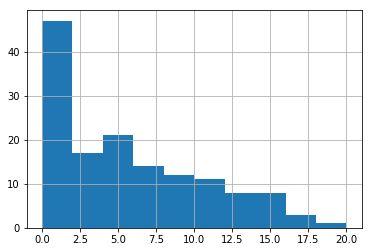

In [33]:
df_p_obese.car_length.hist()

In [34]:
df_p_fit = df_pitchers[df_pitchers['bmi'] <= 30]

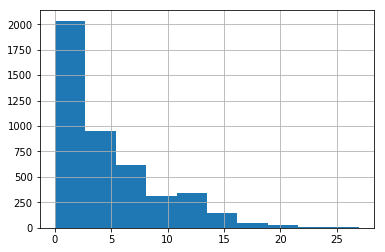

In [35]:
df_p_fit.car_length.hist()

In [36]:
df_p_fit.car_length.mean()

4.525333333333333

In [37]:
df_pitchers.reset_index(drop = True, inplace = True)

In [38]:
df_pitchers

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
0,76,315,player.php?p=diazju03,Jumbo Diaz,2014,2017,P,3,38.338816
1,72,265,player.php?p=mijarjo01,Jose Mijares,2008,2013,P,5,35.936535
2,75,280,player.php?p=brittch01,Chris Britton,2006,2008,P,2,34.993778
3,76,285,player.php?p=broxtjo01,Jonathan Broxton,2005,2017,P,12,34.687500
4,72,255,player.php?p=machije01,Jean Machi,2012,2017,P,5,34.580440
5,76,280,player.php?p=silvaca01,Carlos Silva,2002,2010,P,8,34.078947
6,72,250,player.php?p=garceri01,Rich Garces,1990,2002,P,12,33.902392
7,75,270,player.php?p=jenksbo01,Bobby Jenks,2005,2011,P,6,33.744000
8,70,235,player.php?p=harrile01,Lenny Harris,1998,2005,P,7,33.715306
9,73,255,player.php?p=queveru01,Ruben Quevedo,2000,2003,P,3,33.639520


In [39]:
stats.ttest_ind(df_p_fit.car_length, df_p_obese.car_length, equal_var = False)

Ttest_indResult(statistic=-1.8736219164562633, pvalue=0.06293652884810132)

In [45]:
df_matcher = pd.read_csv('~/Downloads/people.csv')[['name_first', 'name_last', 'key_fangraphs']]

/home/ethanarsht/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
df_matcher.columns

Index(['name_first', 'name_last', 'key_fangraphs'], dtype='object')

In [47]:
df_matcher['name'] = (df_matcher['name_first'] + ' ' + df_matcher['name_last'])

In [48]:
df_matcher['name']

0             Evert-Jean 't Hoen
1                            NaN
2                      Al Aaberg
3                   Kirk Aadland
4                     Zach Aaker
5                    Zach Aakhus
6                  Brady Aalbers
7                 Brian Aanderud
8                Gerald Aanonsen
9                            NaN
10                 David Aardsma
11                      Ed Aaron
12                    Ging Aaron
13                    Hank Aaron
14                    Lary Aaron
15                  Melvin Aaron
16                  Robert Aaron
17                     Tom Aaron
18                  Tommie Aaron
19                   W. M. Aaron
20                  Wilmer Aaron
21                   Eric Aarons
22                Glenn Aaronson
23                      Don Aase
24                   Kermit Aase
25                    Cody Aasen
26                     Andy Abad
27                Che Yeyne Abad
28                 Fernando Abad
29                    Henry Abad
30        

In [49]:
df_matched = pd.merge(df_matcher, df_pitchers, how = 'outer', on = 'name').dropna(subset = ['height'])

In [50]:
df_pitchers

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
0,76,315,player.php?p=diazju03,Jumbo Diaz,2014,2017,P,3,38.338816
1,72,265,player.php?p=mijarjo01,Jose Mijares,2008,2013,P,5,35.936535
2,75,280,player.php?p=brittch01,Chris Britton,2006,2008,P,2,34.993778
3,76,285,player.php?p=broxtjo01,Jonathan Broxton,2005,2017,P,12,34.687500
4,72,255,player.php?p=machije01,Jean Machi,2012,2017,P,5,34.580440
5,76,280,player.php?p=silvaca01,Carlos Silva,2002,2010,P,8,34.078947
6,72,250,player.php?p=garceri01,Rich Garces,1990,2002,P,12,33.902392
7,75,270,player.php?p=jenksbo01,Bobby Jenks,2005,2011,P,6,33.744000
8,70,235,player.php?p=harrile01,Lenny Harris,1998,2005,P,7,33.715306
9,73,255,player.php?p=queveru01,Ruben Quevedo,2000,2003,P,3,33.639520


In [51]:
df_matched.dropna(subset = ['height', 'name_first', 'key_fangraphs'], inplace = True)

In [52]:
df_matched.reset_index(drop = True, inplace = True)

In [53]:
df_matched[df_matched.name_last == 'Pichardo']

,name_first,name_last,key_fangraphs,name,height,weight,url,firstyear,lastyear,primary_pos,car_length,bmi
3377,Hipolito,Pichardo,1472.0,Hipolito Pichardo,73.0,185.0,player.php?p=pichahi01,1992.0,2002.0,P,10.0,24.405142


In [54]:
df_matched

,name_first,name_last,key_fangraphs,name,height,weight,url,firstyear,lastyear,primary_pos,car_length,bmi
0,David,Aardsma,1902.0,David Aardsma,77.0,220.0,player.php?p=aardsda01,2004.0,2015.0,P,11.0,26.085343
1,Don,Aase,1000003.0,Don Aase,75.0,210.0,player.php?p=aasedo01,1977.0,1990.0,P,13.0,26.245333
2,Fernando,Abad,4994.0,Fernando Abad,73.0,220.0,player.php?p=abadfe01,2010.0,2017.0,P,7.0,29.022331
3,Glenn,Abbott,1000010.0,Glenn Abbott,78.0,200.0,player.php?p=abbotgl01,1973.0,1984.0,P,11.0,23.109796
4,Jim,Abbott,1000012.0,Jim Abbott,75.0,210.0,player.php?p=abbotji01,1989.0,1999.0,P,10.0,26.245333
5,Kyle,Abbott,1000014.0,Kyle Abbott,76.0,200.0,player.php?p=abbotky01,1991.0,1996.0,P,5.0,24.342105
6,Paul,Abbott,1061.0,Paul Abbott,75.0,185.0,player.php?p=abbotpa01,1990.0,2004.0,P,14.0,23.120889
7,Johnny,Abrego,1000027.0,Johnny Abrego,72.0,185.0,player.php?p=abregjo01,1985.0,1985.0,P,0.0,25.087770
8,Juan,Abreu,6306.0,Juan Abreu,72.0,185.0,player.php?p=abreuju01,2011.0,2011.0,P,0.0,25.087770
9,Winston,Abreu,582.0,Winston Abreu,74.0,170.0,player.php?p=abreuwi01,2006.0,2009.0,P,3.0,21.824324


In [55]:
df_duped= df_matched[df_matched['name'].duplicated(keep = False)]

In [60]:
df_duped.drop_duplicates(subset = ['name', 'firstyear', 'lastyear'])

,name_first,name_last,key_fangraphs,name,height,weight,url,firstyear,lastyear,primary_pos,car_length,bmi
20,Austin,Adams,13801.0,Austin Adams,71.0,200.0,player.php?p=adamsau01,2014.0,2016.0,P,2.0,27.891291
22,Mike,Adams,1000059.0,Mike Adams,77.0,210.0,player.php?p=adamsmi03,2004.0,2014.0,P,10.0,24.899646
25,Willie,Adams,1000065.0,Willie Adams,79.0,215.0,player.php?p=adamswi02,1996.0,1997.0,P,1.0,24.218074
56,Bob,Allen,1000133.0,Bob Allen,74.0,185.0,player.php?p=allenbo04,1961.0,1967.0,P,6.0,23.750000
73,Jose,Alvarez,5358.0,Jose Alvarez,70.0,170.0,player.php?p=alvarjo01,1981.0,1989.0,P,8.0,24.389796
84,Brian,Anderson,18289.0,Brian Anderson,73.0,190.0,player.php?p=anderbr02,1993.0,2005.0,P,12.0,25.064740
94,Mike,Anderson,1000237.0,Mike Anderson,74.0,200.0,player.php?p=andermi01,1979.0,1979.0,P,0.0,25.675676
95,Mike,Anderson,1000237.0,Mike Anderson,75.0,200.0,player.php?p=andermi02,1993.0,1993.0,P,0.0,24.995556
98,Rick,Anderson,1000240.0,Rick Anderson,74.0,210.0,player.php?p=anderri01,1979.0,1980.0,P,1.0,26.959459
99,Rick,Anderson,1000240.0,Rick Anderson,72.0,175.0,player.php?p=anderri02,1986.0,1988.0,P,2.0,23.731674


In [57]:
f = requests.get('https://www.fangraphs.com/statss.aspx?playerid=13801.0')
    
f_soup = BeautifulSoup(f.content.decode('utf-8'), 'html.parser')

tables = f_soup.find_all('table', {'class': 'rgMasterTable', 'id': 'SeasonStats1_dgSeason11_ctl00'})

war_table = tables[0]

trs = war_table.find_all('tr')

for tr in trs:

    if tr:
        tds = tr.find_all('td')

In [58]:
tds

[<td class="grid_line_regular"><a href="http://www.fangraphs.com/leaders.aspx?pos=all&amp;stats=pit&amp;lg=all&amp;qual=y&amp;type=8&amp;season=2018&amp;month=0&amp;season1=2017&amp;ind=0&amp;team=0&amp;rost=0&amp;players=0">Total</a></td>,
 <td class="grid_line_regular">- - -</td>,
 <td align="right" class="grid_line_regular">0</td>,
 <td align="right" class="grid_line_regular">0</td>,
 <td align="right" class="grid_line_regular">0</td>,
 <td align="right" class="grid_line_regular">8</td>,
 <td align="right" class="grid_line_regular">0</td>,
 <td align="right" class="grid_line_regular">6.0</td>,
 <td align="right" class="grid_line_break">15.00</td>,
 <td align="right" class="grid_line_regular">16.50</td>,
 <td align="right" class="grid_line_regular">0.00</td>,
 <td align="right" class="grid_line_regular">.357</td>,
 <td align="right" class="grid_line_regular">76.5 %</td>,
 <td align="right" class="grid_line_regular">42.9 %</td>,
 <td align="right" class="grid_line_regular">0.0 %</td>,

In [60]:

def war_scraper(name, player_id):
    global df_player
    
    f = requests.get('https://www.fangraphs.com/statss.aspx?playerid={}'.format(player_id))
    
    f_soup = BeautifulSoup(f.content.decode('utf-8'), 'html.parser')

    tables = f_soup.find_all('table', {'class': 'rgMasterTable', 'id': 'SeasonStats1_dgSeason11_ctl00'})

    war_table = tables[0]

    trs = war_table.find_all('tr')

    for tr in trs:

        if tr:
            tds = tr.find_all('td')
            if tds:
                if tds[-1].text != '\xa0': 
                    df_list.append(
                    {
                        'year': tds[0].text,
                        'war': tds[-1].text,
                        'team': tds[1].text,
                        'name': name,
                        'games': tds[5],
                        'gs': tds[6]
                    })
    df_player = pd.DataFrame(df_list)
    
    df_player = df_player[~df_player['team'].str.contains('Depth Charts|Steamer|Fans|Zips|ZiPS|- - -')]
    
    df_player = df_player.drop_duplicates(subset = ['name','year'], keep = 'first').reset_index(drop = True)
    
    df_player.war = pd.to_numeric(df_player.war, errors = 'coerce')

In [62]:
df_list = []
for name, key, n in zip(df_matched.name, df_matched.key_fangraphs, range(0, len(df_matched))):
    print(name)
    print(str(n) + '/' + str(len(df_matched)))
    war_scraper(name, key)

David Aardsma
0/4831
Don Aase
1/4831
Fernando Abad
2/4831
Glenn Abbott
3/4831
Jim Abbott
4/4831
Kyle Abbott
5/4831
Paul Abbott
6/4831
Johnny Abrego
7/4831
Juan Abreu
8/4831
Winston Abreu
9/4831
Jeremy Accardo
10/4831
Jose Acevedo
11/4831
Juan Acevedo
12/4831
Alfredo Aceves
13/4831
Jim Acker
14/4831
Fritz Ackley
15/4831
Cy Acosta
16/4831
Ed Acosta
17/4831
Manny Acosta
18/4831
Mark Acre
19/4831
Austin Adams
20/4831
Austin Adams
21/4831
Mike Adams
22/4831
Mike Adams
23/4831
Terry Adams
24/4831
Willie Adams
25/4831
Willie Adams
26/4831
Joel Adamson
27/4831
Mike Adamson
28/4831
Nick Adenhart
29/4831
Jon Adkins
30/4831
Steve Adkins
31/4831
Tim Adleman
32/4831
Jeremy Affeldt
33/4831
Juan Agosto
34/4831
Rick Aguilera
35/4831
Pat Ahearne
36/4831
Kurt Ainsworth
37/4831
Jack Aker
38/4831
Darrel Akerfelds
39/4831
Gibson Alba
40/4831
Jonathan Albaladejo
41/4831
Jose Alberro
42/4831
Andrew Albers
43/4831
Al Alburquerque
44/4831
Vic Albury
45/4831
Santo Alcala
46/4831
Raul Alcantara
47/4831
Scott Ald

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


Jose Alvarez
74/4831
Juan Alvarez
75/4831
Tavo Alvarez
76/4831
Victor Alvarez
77/4831
Wilson Alvarez
78/4831
Alexi Amarista
79/4831
Hector Ambriz
80/4831
Steve Ames
81/4831
Larry Andersen
82/4831
Allan Anderson
83/4831
Brian Anderson
84/4831
Brian Anderson
85/4831
Brian Anderson
86/4831
Bud Anderson
87/4831
Cody Anderson
88/4831
Craig Anderson
89/4831
Jason Anderson
90/4831
Jimmy Anderson
91/4831
Larry Anderson
92/4831
Matt Anderson
93/4831
Mike Anderson
94/4831
Mike Anderson
95/4831
Mike Anderson
96/4831
Mike Anderson
97/4831
Rick Anderson
98/4831
Rick Anderson
99/4831
Rick Anderson
100/4831
Rick Anderson
101/4831
Scott Anderson
102/4831
Steve Andrade
103/4831
Clayton Andrews
104/4831
John Andrews
105/4831
Joaquin Andujar
106/4831
Luis Andujar
107/4831
Norm Angelini
108/4831
Dean Anna
109/4831
Dustin Antolin
110/4831
Bob Apodaca
111/4831
Luis Aponte
112/4831
Kevin Appier
113/4831
Greg Aquino
114/4831
Jayson Aquino
115/4831
Luis Aquino
116/4831
Elvis Araujo
117/4831
Jim Archer
118/4831

KeyboardInterrupt: 

In [ ]:
df_player_saved = pd.concat([df_player_saved, df_player])

In [63]:
df_player

NameError: name 'df_player' is not defined

In [64]:
df_player_saved.to_csv('pitcher_war.csv')

NameError: name 'df_player_saved' is not defined

In [307]:
df_player_saved.to_csv('~/Downloads/pitcher_war.csv')

In [155]:
df_player.war = pd.to_numeric(df_player.war, errors = 'coerce')

In [59]:
df_pwar = pd.read_csv('pitcher_war.csv', index_col = 0)

In [31]:
df_pwar

,name,team,war,year
0,David Aardsma,Giants,-0.3,2004
1,David Aardsma,Cubs,-0.2,2006
2,David Aardsma,White Sox,0.2,2007
3,David Aardsma,Red Sox,-0.1,2008
4,David Aardsma,Mariners,1.8,2009
5,David Aardsma,Mariners,0.1,2010
6,David Aardsma,Yankees,-0.1,2012
7,David Aardsma,Mets,-0.6,2013
8,David Aardsma,Braves,-0.4,2015
9,Don Aase,Red Sox,2.2,1977


In [45]:
def drop_duplicate_players(player):
    global df_pwar
    
    print(player)

    df_player = df_pwar[df_pwar['name'] == player]

    df_player['year'] = df_player['year'].astype(int)

    df_player_years = df_matched[df_matched.name == player].iloc[0]

    years = range(int(df_player_years['firstyear']), int(df_player_years['lastyear'] + 1))



    drop_mask = df_player[~df_player.year.isin(years)]
    if drop_mask.empty == False:
        df_pwar = df_pwar.drop(drop_mask.index)



In [46]:
df_pwar

,name,team,war,year
0,David Aardsma,Giants,-0.3,2004
1,David Aardsma,Cubs,-0.2,2006
2,David Aardsma,White Sox,0.2,2007
3,David Aardsma,Red Sox,-0.1,2008
4,David Aardsma,Mariners,1.8,2009
5,David Aardsma,Mariners,0.1,2010
6,David Aardsma,Yankees,-0.1,2012
7,David Aardsma,Mets,-0.6,2013
8,David Aardsma,Braves,-0.4,2015
9,Don Aase,Red Sox,2.2,1977


In [47]:
for n in df_pwar.name.unique():
    drop_duplicate_players(n)

David Aardsma
Don Aase
Fernando Abad


/home/ethanarsht/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Glenn Abbott
Jim Abbott
Kyle Abbott
Paul Abbott
Johnny Abrego
Juan Abreu
Winston Abreu
Jeremy Accardo
Jose Acevedo
Juan Acevedo
Alfredo Aceves
Jim Acker
Fritz Ackley
Cy Acosta
Ed Acosta
Manny Acosta
Mark Acre
Austin Adams
Mike Adams
Terry Adams
Willie Adams
Joel Adamson
Mike Adamson
Nick Adenhart
Jon Adkins
Steve Adkins
Tim Adleman
Jeremy Affeldt
Juan Agosto
Rick Aguilera
Pat Ahearne
Kurt Ainsworth
Jack Aker
Darrel Akerfelds
Gibson Alba
Jonathan Albaladejo
Jose Alberro
Andrew Albers
Al Alburquerque
Vic Albury
Santo Alcala
Raul Alcantara
Scott Aldred
Mike Aldrete
Jay Aldrich
Doyle Alexander
Gerald Alexander
Manny Alexander
Antonio Alfonseca
Brian Allard
Bob Allen
Lloyd Allen
Neil Allen
Dana Allison
Armando Almanza
Carlos Almanzar
Edwin Almonte
Hector Almonte
Matty Alou
Garvin Alston
Porfi Altamirano
Abe Alvarez
Dario Alvarez
Henderson Alvarez
Jose Alvarez
Juan Alvarez
Tavo Alvarez
Victor Alvarez
Wilson Alvarez
Alexi Amarista
Hector Ambriz
Steve Ames
Larry Andersen
Allan Anderson
Brian A

Jose Cano
Mike Capel
Jose Capellan
Doug Capilla
Carter Capps
Matt Capps
George Cappuzzello
Buzz Capra
Chris Capuano
Matt Carasiti
Conrad Cardinal
Esmailin Caridad
Andrew Carignan
Cisco Carlos
Dan Carlson
Jesse Carlson
Steve Carlton
Buddy Carlyle
Don Carman
Rafael Carmona
Chris Carpenter
Cris Carpenter
David Carpenter
Drew Carpenter
Frank Carpin
Giovanni Carrara
Hector Carrasco
Amalio Carreno
Joel Carreno
Cesar Carrillo
Don Carrithers
Clay Carroll
Scott Carroll
Tom Carroll
Robert Carson
Andy Carter
Jeff Carter
Lance Carter
Larry Carter
Marcos Carvajal
Chuck Cary
Kevin Cash
Larry Casian
Carlos Casimiro
Craig Caskey
Jack Cassel
Bobby Cassevah
Scott Cassidy
Alberto Castillo
Carlos Castillo
Fabio Castillo
Frank Castillo
Juan Castillo
Lendy Castillo
Manny Castillo
Tony Castillo
Angel Castro
Bill Castro
Fabio Castro
Simon Castro
Troy Cate
Mike Cather
Keefe Cato
Bill Caudill
Andy Cavazos
Jose Cecena
Jose Ceda
Jaime Cerda
Juan Cerros
John Cerutti
Hunter Cervenka
Alejandro Chacin
Gustavo Chacin


Jeff Farnsworth
Kyle Farnsworth
Jim Farr
Steve Farr
John Farrell
Jeff Fassero
Darcy Fast
Bill Faul
Andrew Faulkner
Ryan Feierabend
Scott Feldman
Pedro Feliciano
Neftali Feliz
Terry Felton
Ramon Fermin
Alex Fernandez
Jared Fernandez
Jose Fernandez
Osvaldo Fernandez
Sid Fernandez
Anthony Ferrari
Tony Ferreira
Jeff Ferrell
Bob Ferris
Mike Fetters
Mark Fidrych
Nate Field
Casey Fien
Danny Fife
Stephen Fife
Alfredo Figaro
Ed Figueroa
Nelson Figueroa
Pedro Figueroa
Jeremy Fikac
Bob File
Tom Filer
Pete Filson
Joel Finch
Rollie Fingers
Chuck Finley
Steve Finley
Gar Finnvold
Tony Fiore
Steve Fireovid
Hank Fischer
Jeff Fischer
Todd Fischer
Brian Fisher
Carlos Fisher
Fritz Fisher
Tom Fisher
Brian Fitzgerald
Al Fitzmorris
Mike Flanagan
Yohan Flande
John Flavin
Dave Fleming
Huck Flener
Paul Fletcher
Tom Fletcher
John Flinn
Don Florence
Kendry Flores
Randy Flores
Ron Flores
Bryce Florie
Gavin Floyd
Josh Fogg
Tom Foley
Rich Folkers
Joe Fontenot
Ray Fontenot
Jim Foor
Jesse Foppert
Ben Ford
Dave Ford
Ma

Bret Prinz
Mark Prior
Scott Proctor
Luke Prokopec
Mike Proly
Stephen Pryor
Brandon Puffer
Tim Pugh
Charlie Puleo
Alfonso Pulido
Carlos Pulido
Bill Pulsipher
David Purcey
John Purdin
Matt Purke
Luke Putkonen
Zach Putnam
Chad Qualls
Paul Quantrill
Ruben Quevedo
Luis Quintana
Rafael Quirico
Art Quirk
Dan Quisenberry
Ryan Raburn
Mike Raczka
Dick Radatz
Scott Radinsky
Brad Radke
Rob Radlosky
Al Raffo
Brady Raggio
Eric Raich
Steve Rain
Chuck Rainey
Dave Rajsich
Aaron Rakers
Jason Rakers
Ed Rakow
Brooks Raley
Allan Ramirez
Edwar Ramirez
Elizardo Ramirez
Elvin Ramirez
Erasmo Ramirez
Hector Ramirez
Horacio Ramirez
Ramon Ramirez
Roberto Ramirez
Santiago Ramirez
Cesar Ramos
Edgar Ramos
Mario Ramos
Robert Ramsay
Anthony Ranaudo
Scott Randall
Clay Rapada
Pat Rapp
Cory Rasmus
Dennis Rasmussen
Eric Rasmussen
Rob Rasmussen
Darrell Rasner
Fred Rath
Gary Rath
Gene Ratliff
Jon Ratliff
Steve Ratzer
Doug Rau
Bob Rauch
Jon Rauch
Lance Rautzhan
Shane Rawley
Chris Ray
Jim Ray
Ken Ray
Robert Ray
Barry Raziano


Jay Spurgeon
Chris Spurling
Mike Squires
Randy St. Claire
George Stablein
Bill Stafford
Tracy Stallard
Jason Standridge
Al Stanek
Kevin Stanfield
Jason Stanford
Daniel Stange
Lee Stange
Don Stanhouse
Rob Stanifer
Bob Stanley
Mike Stanton
Dave Stapleton
Denny Stark
Herm Starrette
Tim Stauffer
Gene Stechschulte
Kennie Steenstra
Morrie Steevens
Blake Stein
Randy Stein
Rick Steirer
Jeff Stember
Steve Stemle
Dave Stenhouse
Buzz Stephen
John Stephens
Earl Stephenson
Garrett Stephenson
Jerry Stephenson
Robert Stephenson
Randy Sterling
Mitch Stetter
Dave Stevens
Jeff Stevens
Dave Stewart
Josh Stewart
Sammy Stewart
Scott Stewart
Zach Stewart
Phil Stidham
Dick Stigman
Josh Stinson
Matt Stites
Phil Stockman
Bob Stoddard
Tim Stoddard
Brian Stokes
George Stone
Ricky Stone
Steve Stone
Bill Stoneman
Tobi Stoner
Jim Stoops
Drew Storen
Mickey Storey
Mel Stottlemyre
Todd Stottlemyre
Hal Stowe
Mike Strahler
Les Straker
Bob Strampe
Pat Strange
Huston Street
Jim Strickland
Scott Strickland
John Strohmayer


Clint Zavaras
Josh Zeid
Todd Zeile
Bill Zepp
Chad Zerbe
Steve Ziem
Jeff Zimmerman
Jordan Zimmerman
Charlie Zink
Barry Zito
Joel Zumaya
Tony Zych


In [48]:
df_pwar.year = df_pwar.year.astype(int)

In [49]:
df_pwar[df_pwar.year < 1960]

,name,team,war,year


In [136]:
df_combined = pd.merge(df_pwar, df_pitchers, on = 'name', how = 'outer').drop(['firstyear', 'lastyear', 'primary_pos', 'car_length', 'url'], axis = 1)

In [137]:
df_combined['yoc'] = np.NaN

In [138]:
df_combined[df_combined.name == 'Bob Malloy']

,name,team,war,year,height,weight,bmi,yoc
17372,Bob Malloy,NaN,NaN,NaN,77,200,23.713948,NaN


In [139]:
df_combined.drop_duplicates(subset = ['name', 'yoc', 'year', 'war', 'team'], keep = False, inplace = True)

In [140]:
df_combined = df_combined[~df_combined.name.str.contains('Dave Roberts|Henry Rodriguez')]

In [141]:
df_yoc = df_combined

In [142]:
for p in df_yoc.name.unique():
    df_p = df_combined[df_combined.name == p]
    
    df_p = df_p.reset_index()
    df_p['yoc'] = df_p.index
    df_p = df_p.set_index('index')
    for i, row in df_p.iterrows():
        
        df_yoc.loc[i, ['yoc']] = (row['year'] - df_p.iloc[0, 3]) + 1
          

In [143]:
df_yoc[df_yoc.yoc < 0]

,name,team,war,year,height,weight,bmi,yoc


In [144]:
df_yoc.dropna(subset = ['yoc'], inplace = True)

In [226]:
df_co = df_combined[df_combined.bmi >= 25]

In [227]:
len(df_co)

9668

In [228]:
df_sv = df_combined[df_combined.bmi < 25]

In [229]:
len(df_sv)

5966

In [230]:
sv_year_counts = pd.DataFrame(df_sv.yoc.value_counts())

In [231]:
co_year_counts = pd.DataFrame(df_co.yoc.value_counts())

In [232]:
co_year_counts

,yoc
1.0,1760
2.0,1227
3.0,1000
4.0,930
5.0,788
6.0,674
7.0,609
8.0,516
9.0,447
10.0,394


In [233]:
co_war = []
sv_war = []

In [234]:
import math
def war_means(df, war_list):
    for i in df.yoc.unique():
        print(i)
        df_y = df[df.yoc == i]
        y_mean = df_y.war.mean()
        if math.isnan(y_mean):
            print(df_y, i)
        war_list.append(y_mean)
    return war_list

In [235]:
co_war = war_means(df_co, co_war)

1.0
3.0
4.0
5.0
6.0
7.0
9.0
10.0
12.0
2.0
8.0
11.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
23.0
0.0
22.0
24.0
25.0
26.0
27.0
28.0


In [236]:
war_list = war_means(df_sv, sv_war)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
11.0
12.0
10.0
13.0
14.0
15.0
16.0
18.0
17.0
19.0
20.0
21.0
22.0
23.0
24.0


In [237]:
sv_war

[0.17739726027397246,
 0.4037780401416768,
 0.5492514970059877,
 0.6935153583617747,
 0.7121756487025951,
 0.7479809976247036,
 0.7373961218836559,
 0.7591695501730108,
 0.8662337662337667,
 0.813207547169811,
 0.6739495798319329,
 0.8080952380952385,
 0.7325581395348837,
 0.8444444444444446,
 0.6547619047619049,
 0.75,
 0.25,
 1.1823529411764708,
 1.2,
 1.08,
 1.1400000000000001,
 0.9,
 0.4,
 0.0]

In [245]:
co_year_counts['war'] = co_war
sv_year_counts['war'] = sv_war

In [246]:
sv_year_counts.drop(0, inplace = True)

KeyError: 'labels [0] not contained in axis'

In [247]:
co_year_counts.drop(0, inplace = True)

In [248]:
co_year_counts

,yoc,war,ar
1.0,1760,0.231818,NaN
2.0,1227,0.706900,-0.302841
3.0,1000,0.774946,-0.185004
4.0,930,0.863071,-0.070000
5.0,788,0.930415,-0.152688
6.0,674,0.901970,-0.144670
7.0,609,0.926622,-0.096439
8.0,516,0.815990,-0.152709
9.0,447,0.842149,-0.133721
10.0,394,0.493073,-0.118568


In [249]:
sv_year_counts['ar'] = sv_year_counts['yoc'].pct_change()

In [250]:
co_year_counts['ar'] = co_year_counts['yoc'].pct_change()

In [251]:
co_year_counts

,yoc,war,ar
1.0,1760,0.231818,NaN
2.0,1227,0.706900,-0.302841
3.0,1000,0.774946,-0.185004
4.0,930,0.863071,-0.070000
5.0,788,0.930415,-0.152688
6.0,674,0.901970,-0.144670
7.0,609,0.926622,-0.096439
8.0,516,0.815990,-0.152709
9.0,447,0.842149,-0.133721
10.0,394,0.493073,-0.118568


In [260]:
df_sv_plot = sv_year_counts.loc[:15]
df_co_plot = co_year_counts.loc[:15]

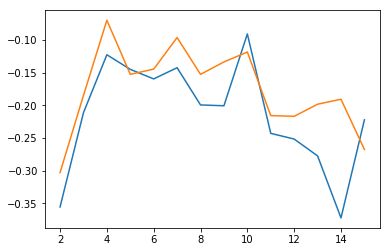

In [261]:
plt.plot(df_sv_plot['ar'])
plt.plot(df_co_plot['ar'])

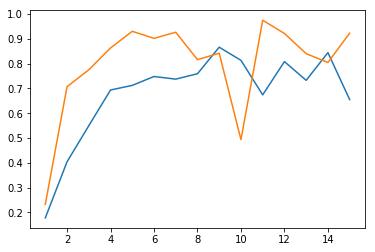

In [262]:
plt.plot(df_sv_plot['war'])
plt.plot(df_co_plot['war'])